### Question 1 - Implement 3 different CNN architectures with a comparison table for the MNSIT dataset using the Tensorflow library.
**Note -**
1. The model parameters for each architecture should not be more than 8000 parameters
2. Code comments should be given for proper code understanding.
3. The minimum accuracy for each accuracy should be at least 96%

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import tensorflow as tf 
import seaborn as sns
from tensorflow.keras import layers

In [3]:
mnist=tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

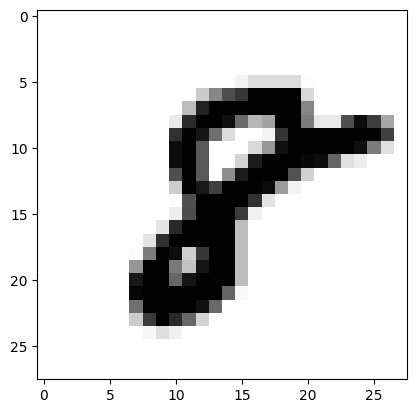

In [6]:
plt.imshow(X_train_full[45678],cmap='binary')
plt.axis("on")
plt.show()

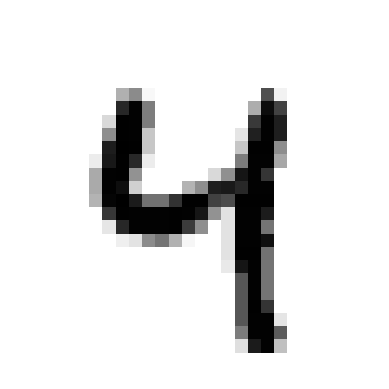

In [7]:
plt.imshow(X_train_full[57548],cmap='binary')
plt.axis("off")
plt.show()

<Axes: >

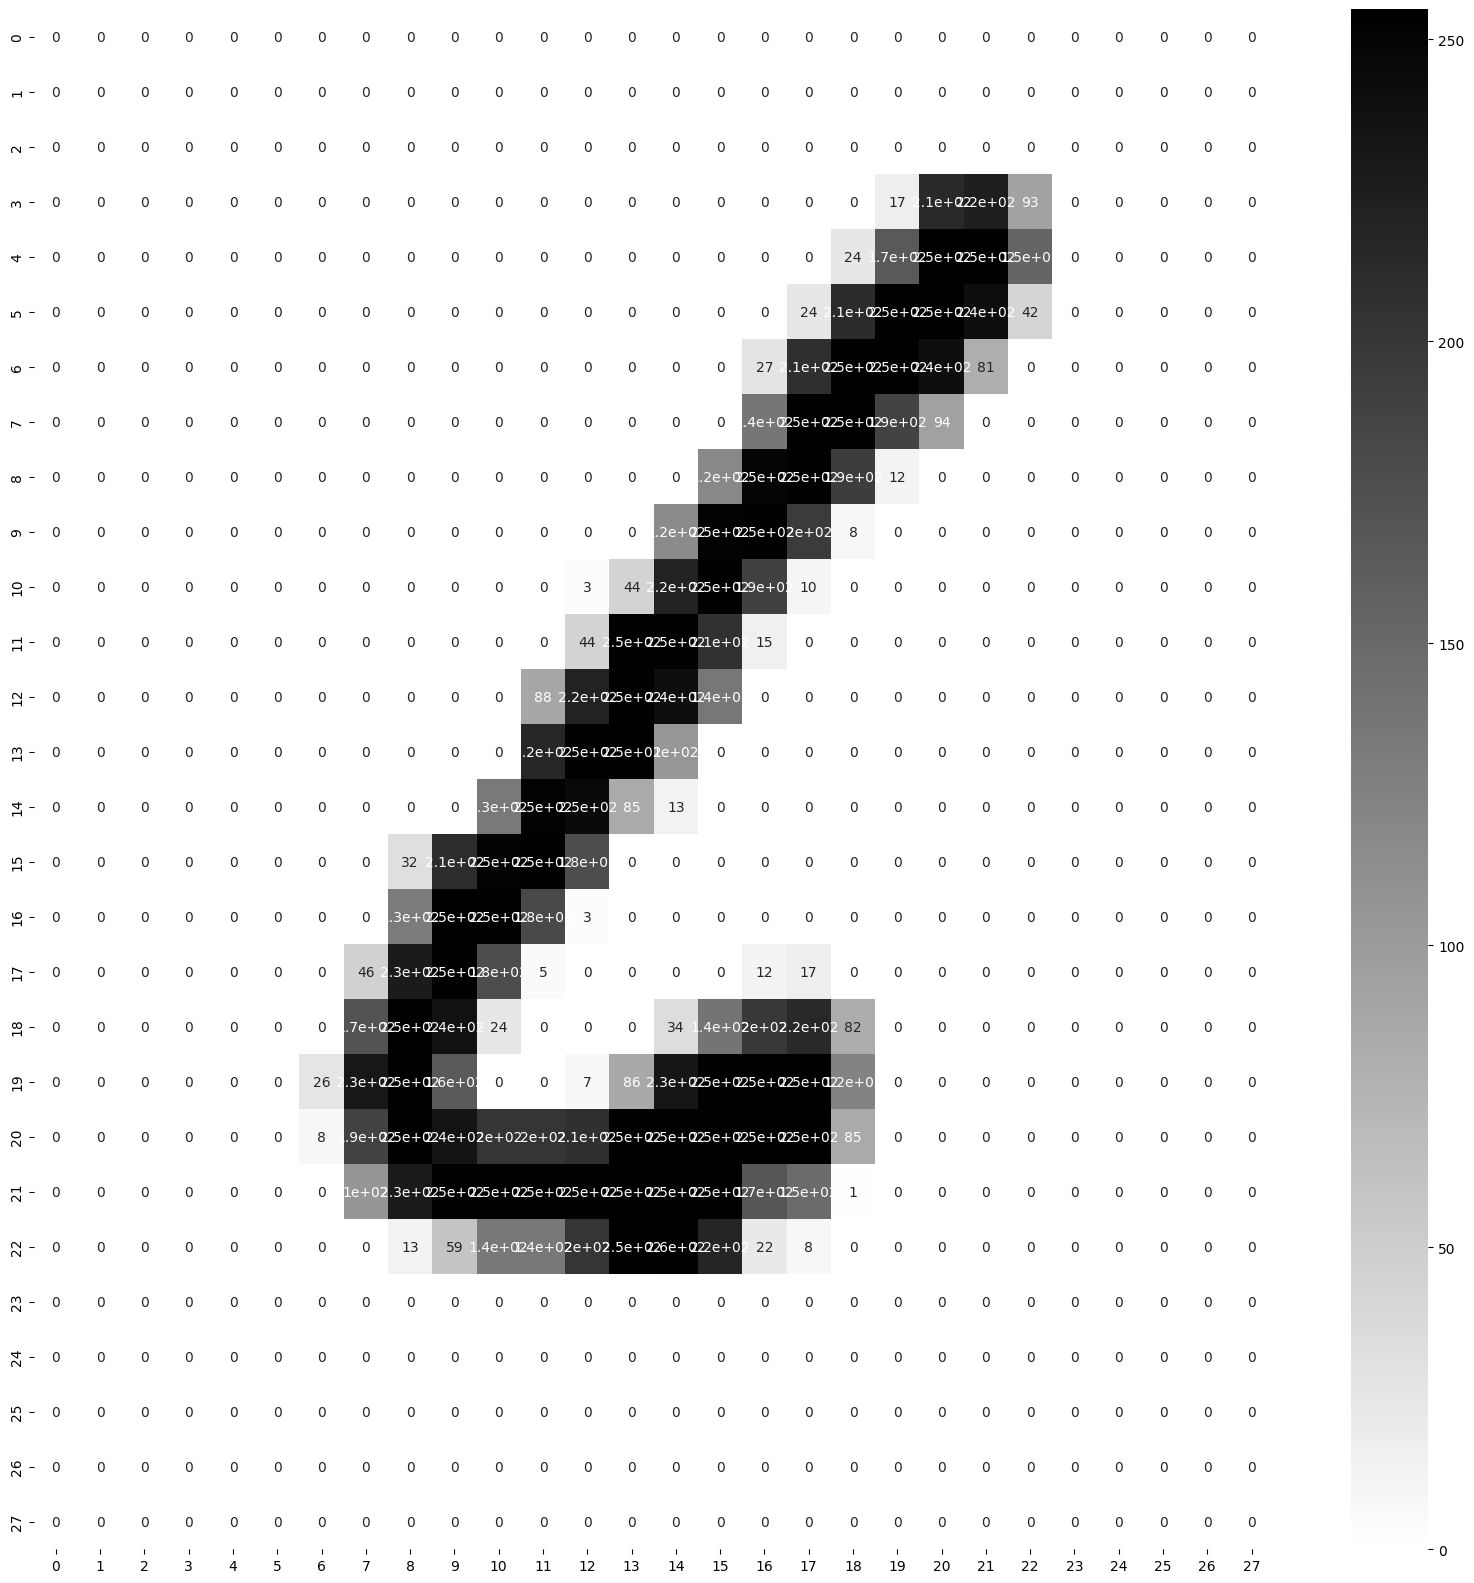

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[34765],annot=True,cmap="binary")

In [9]:
#Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid,X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [10]:
#Scale the test set as well
X_test = X_test/255

In [11]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

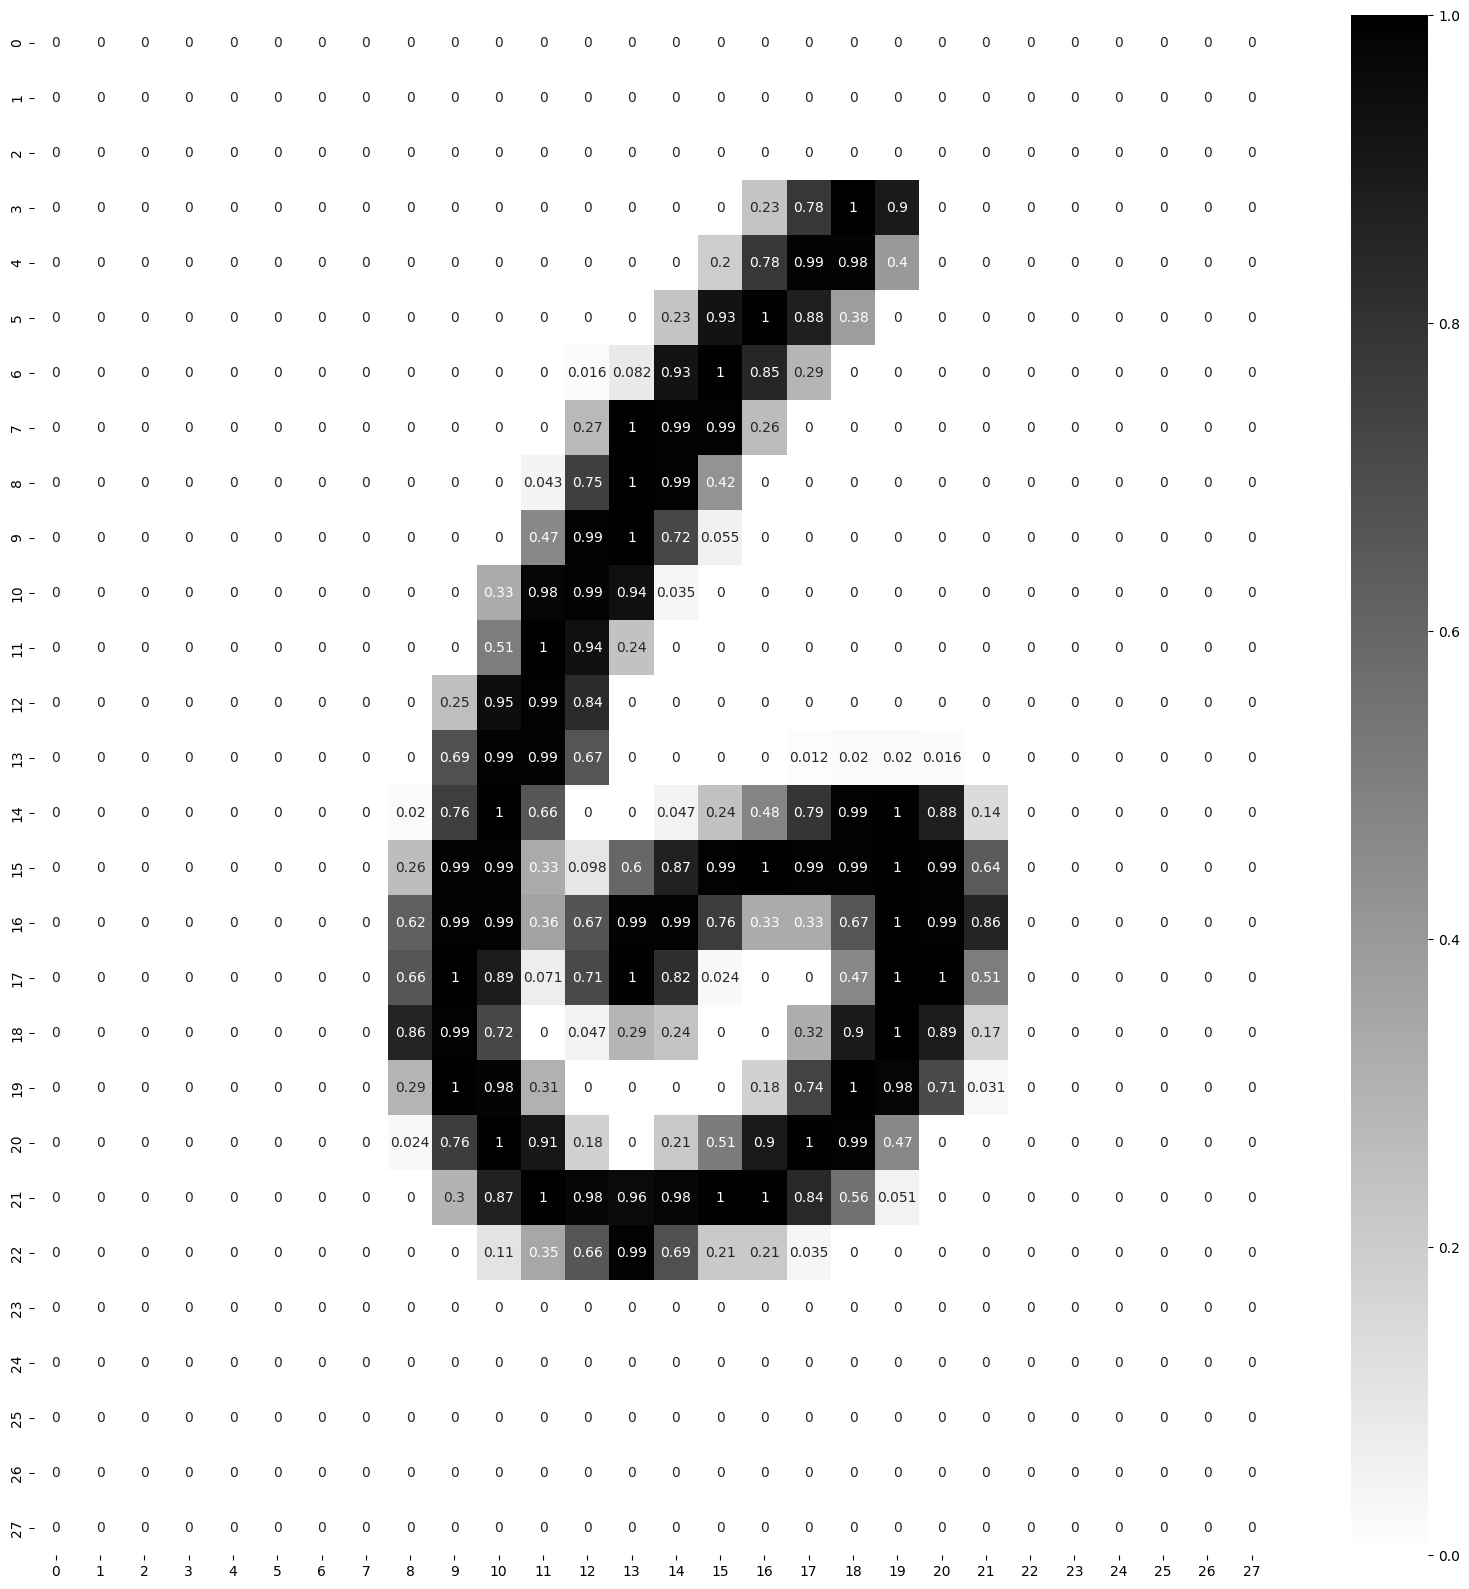

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [12]:
# Define the LeNet-5 model
model_lenet5 = tf.keras.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
# Compile the model
model_lenet5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
history = model_lenet5.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0602 - val_accuracy: 0.9872
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0593 - val_accuracy: 0.9882
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0467 - val_accuracy: 0.9892
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0489 - val_accuracy: 0.9892
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0510 - val_accuracy: 0.9890
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0483 - val_accuracy: 0.9900
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0466 - val_accuracy:

In [20]:
# Save the Model
import time 
import os 
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir,exist_ok=True)
  filename = time.strftime("LeNet_5_model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,filename)
  print(f"Your model will be saved at the following location\n{model_path}")
  return model_path 

In [21]:
model_lenet5.save(saveModel_path())

Your model will be saved at the following location
/content/SAVED_MODELS/LeNet_5_model_2023_05_24_06_42_48_.h5


In [22]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [23]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.016290,0.994564,0.060238,0.9872
1,0.012295,0.995873,0.059347,0.9882
2,0.012474,0.996255,0.046651,0.9892
3,0.010100,0.996545,0.048886,0.9892
4,0.011148,0.996473,0.051039,0.9890
5,0.010264,0.996600,0.048270,0.9900
6,0.009349,0.996745,0.046649,0.9904
7,0.007468,0.997945,0.057343,0.9872
8,0.008404,0.997327,0.063408,0.9876
9,0.007196,0.997655,0.052970,0.9904


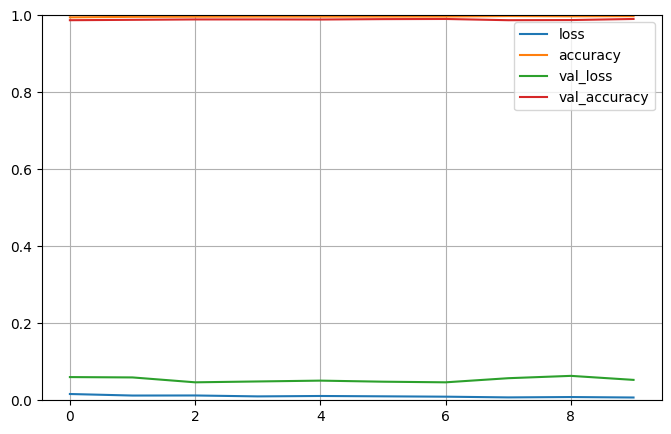

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
Evaluation_lenet5 = model_lenet5.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9895


[0.04784649610519409, 0.9894999861717224]

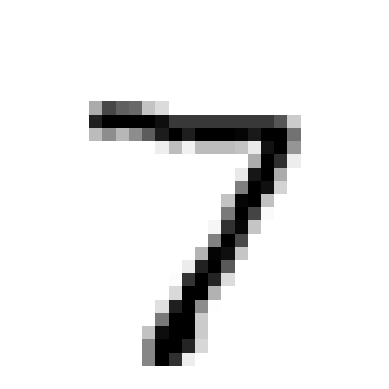

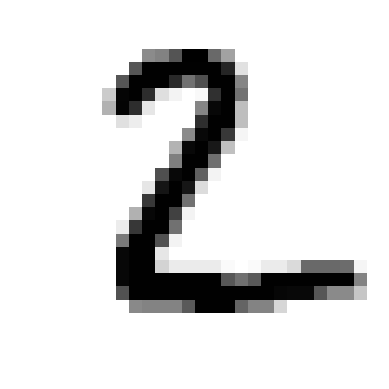

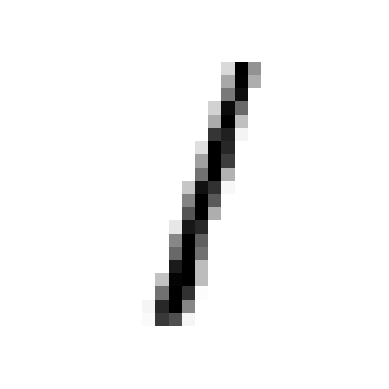

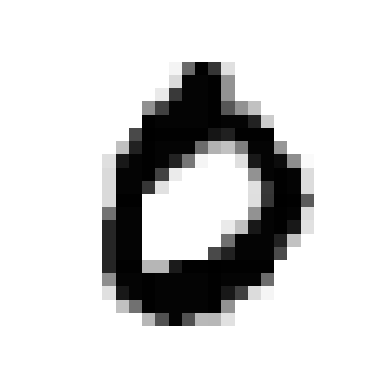

In [26]:
for i in range(0,4):
  plt.imshow(X_test[i],cmap="binary") 
  plt.axis("off")
  plt.show()

In [27]:
prediction=model_lenet5.predict(X_test[:4])
np.argmax(prediction[1])

1/1 [==============================] - 0s 145ms/step


2

In [29]:
np.argmax(prediction[3])

0

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [21]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [22]:
# Resize images to 75x75
X_train_full_resize = tf.image.resize(X_train_full[..., tf.newaxis], (75, 75))
X_test_resize = tf.image.resize(X_test[..., tf.newaxis], (75, 75))

In [26]:
#Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid,X_train = X_train_full_resize[:5000]/255,X_train_full_resize[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [27]:
X_test = X_test_resize/255

In [28]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 75, 75, 1)
(55000, 75, 75, 1)
(5000,)
(55000,)


In [29]:
# Define the Inception-v3 model
model_inceptionv3 = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_shape=(75, 75, 1),
    classes=10
)

In [30]:
# Compile the model
model_inceptionv3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
history1 = model_inceptionv3.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 152s 59ms/step - loss: 0.2474 - accuracy: 0.9355 - val_loss: 0.8219 - val_accuracy: 0.8732
Epoch 2/10
1719/1719 [==============================] - 97s 57ms/step - loss: 0.1215 - accuracy: 0.9703 - val_loss: 0.3492 - val_accuracy: 0.9184
Epoch 3/10
1719/1719 [==============================] - 97s 56ms/step - loss: 0.1162 - accuracy: 0.9708 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 4/10
1719/1719 [==============================] - 114s 66ms/step - loss: 0.0726 - accuracy: 0.9811 - val_loss: 0.0589 - val_accuracy: 0.9840
Epoch 5/10
1719/1719 [==============================] - 116s 68ms/step - loss: 0.0871 - accuracy: 0.9777 - val_loss: 0.0376 - val_accuracy: 0.9896
Epoch 6/10
1719/1719 [==============================] - 110s 64ms/step - loss: 0.0520 - accuracy: 0.9858 - val_loss: 0.0942 - val_accuracy: 0.9734
Epoch 7/10
1719/1719 [==============================] - 115s 67ms/step - loss: 0.0605 - accuracy: 0.9850 - val_loss: 0.0

In [32]:
# Save the Model
import time 
import os 
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir,exist_ok=True)
  filename = time.strftime("model_inceptionv3_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,filename)
  print(f"Your model will be saved at the following location\n{model_path}")
  return model_path 

In [34]:
model_inceptionv3.save(saveModel_path())

Your model will be saved at the following location
/content/SAVED_MODELS/model_inceptionv3_2023_05_24_08_03_55_.h5


In [33]:
history1.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [35]:
pd.DataFrame(history1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.247448,0.935491,0.821933,0.8732
1,0.121472,0.970291,0.349241,0.9184
2,0.116208,0.970836,0.036526,0.9890
3,0.072607,0.981109,0.058898,0.9840
4,0.087073,0.977709,0.037563,0.9896
5,0.052042,0.985800,0.094178,0.9734
6,0.060480,0.985018,0.058672,0.9870
7,0.054779,0.986073,0.243797,0.9146
8,0.042537,0.988073,0.024007,0.9922
9,0.033417,0.990636,0.044916,0.9888


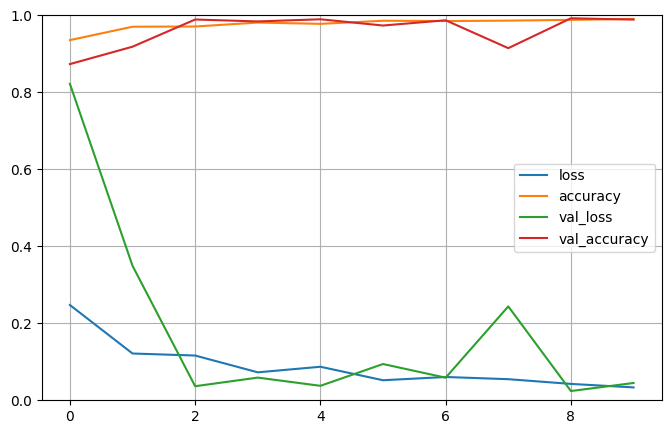

In [36]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
Evaluation_inceptionv3 = model_inceptionv3.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0498 - accuracy: 0.9885


[0.04983983188867569, 0.9884999990463257]

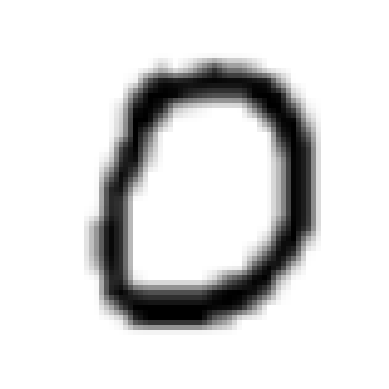

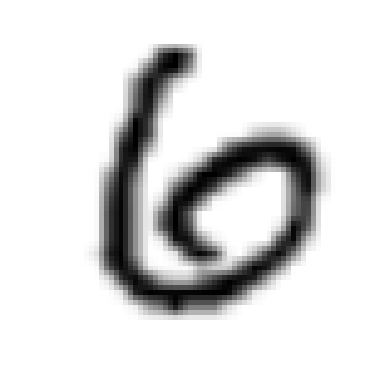

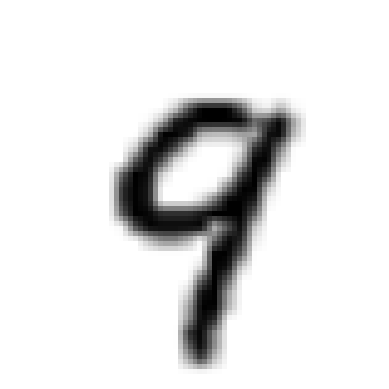

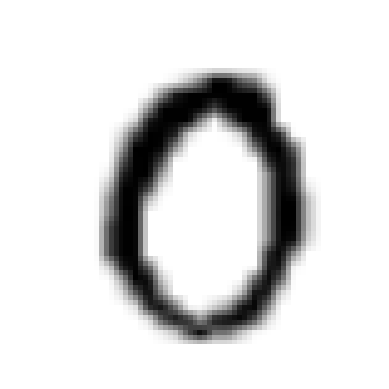

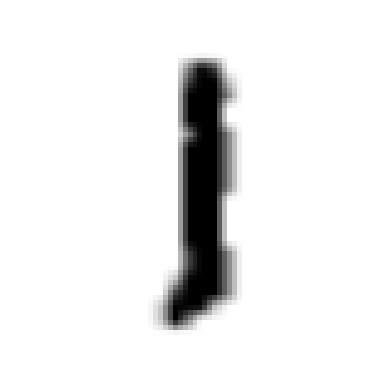

In [38]:
for i in range(10,15):
  plt.imshow(X_test[i],cmap="binary") 
  plt.axis("off")
  plt.show()

In [39]:
prediction=model_inceptionv3.predict(X_test[10:20])

1/1 [==============================] - 2s 2s/step


In [45]:
np.argmax(prediction[1])

6

In [46]:
np.argmax(prediction[4])

1

In [50]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [51]:
# Resize images to 32x32
X_train_full_resize1 = tf.image.resize(X_train_full[..., tf.newaxis], (32, 32))
X_test_resize1 = tf.image.resize(X_test[..., tf.newaxis], (32,32))

In [52]:
#Scale the data between 0 to 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid,X_train = X_train_full_resize1[:5000]/255,X_train_full_resize1[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_resize1/255

In [53]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 32, 32, 1)
(55000, 32, 32, 1)
(5000,)
(55000,)


In [54]:
# Define the ResNet-50 model
model_resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 1),
    classes=10
)

In [55]:
# Compile the model
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
history2 = model_resnet50.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 123s 49ms/step - loss: 0.3759 - accuracy: 0.9117 - val_loss: 3.6134 - val_accuracy: 0.5516
Epoch 2/10
1719/1719 [==============================] - 89s 52ms/step - loss: 0.1573 - accuracy: 0.9615 - val_loss: 0.0514 - val_accuracy: 0.9852
Epoch 3/10
1719/1719 [==============================] - 88s 51ms/step - loss: 0.2579 - accuracy: 0.9463 - val_loss: 0.0841 - val_accuracy: 0.9780
Epoch 4/10
1719/1719 [==============================] - 90s 52ms/step - loss: 0.1920 - accuracy: 0.9534 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 5/10
1719/1719 [==============================] - 84s 49ms/step - loss: 0.1742 - accuracy: 0.9580 - val_loss: 2.9576 - val_accuracy: 0.4408
Epoch 6/10
1719/1719 [==============================] - 77s 45ms/step - loss: 0.1609 - accuracy: 0.9587 - val_loss: 0.2342 - val_accuracy: 0.9368
Epoch 7/10
1719/1719 [==============================] - 78s 45ms/step - loss: 0.1077 - accuracy: 0.9718 - val_loss: 0.0422 

In [57]:
history2.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [58]:
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.375860,0.911745,3.613386,0.5516
1,0.157268,0.961473,0.051354,0.9852
2,0.257861,0.946327,0.084096,0.9780
3,0.192002,0.953400,0.074976,0.9776
4,0.174221,0.958036,2.957556,0.4408
5,0.160909,0.958745,0.234222,0.9368
6,0.107708,0.971800,0.042205,0.9870
7,0.075149,0.980091,45.017986,0.0918
8,0.086810,0.977655,0.046251,0.9862
9,0.090709,0.979345,0.161962,0.9666


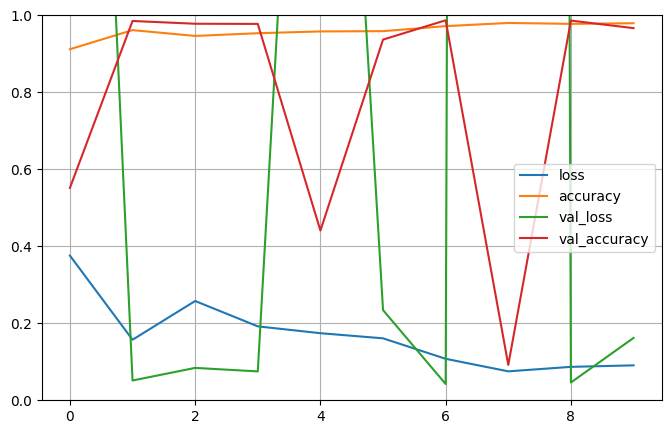

In [59]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [60]:
Evaluation_resnet50 = model_resnet50.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.1678 - accuracy: 0.9674


In [61]:
Evaluation_resnet50[1]

0.9674000144004822

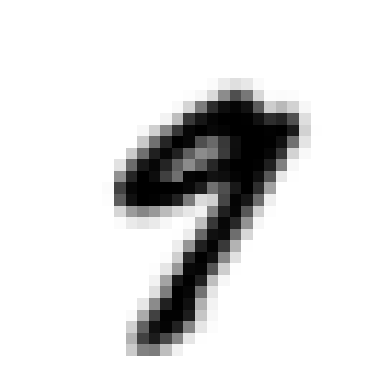

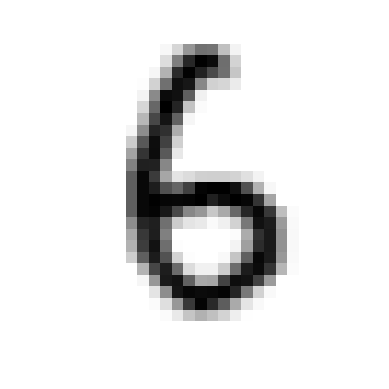

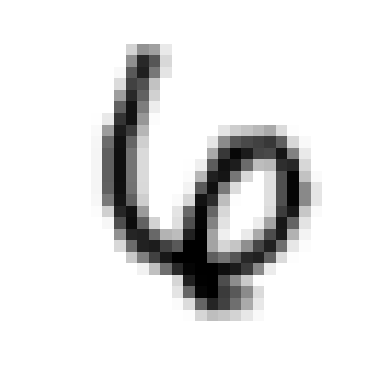

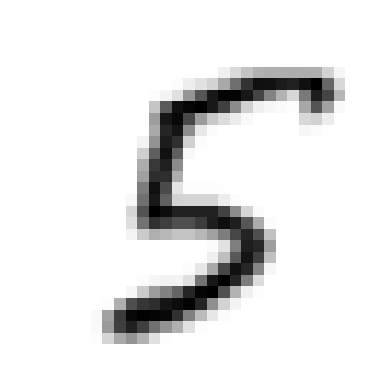

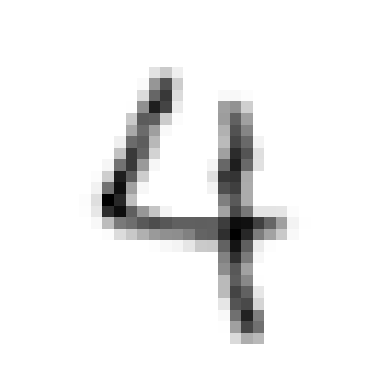

In [62]:
for i in range(20,25):
  plt.imshow(X_test[i],cmap="binary") 
  plt.axis("off")
  plt.show()

In [63]:
prediction=model_inceptionv3.predict(X_test[20:30])

1/1 [==============================] - 1s 1s/step


In [64]:
np.argmax(prediction[4])

0

In [66]:
np.argmax(prediction[7])

0

In [67]:
# Create a comparison table
data = {
    'Model': ['LeNet-5', 'InceptionV3', 'ResNet-50'],
    'Accuracy': [Evaluation_lenet5[1], Evaluation_inceptionv3[1], Evaluation_resnet50[1]]
}

NameError: ignored

In [ ]:
comparison_table = pd.DataFrame(data)
print(comparison_table)